Assignment 1\
Name: Tong Wai Ho\
Sid: 54812369

Question 1

In [2]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import csv
from datetime import datetime
import os
import pandas as pd

In [3]:
# URL of the Goodreads page for "The Godfather"
url = "https://www.goodreads.com/book/show/22034/reviews?reviewFilters=eyJhZnRlciI6Ik5UZ3dOU3d4TmpBd016RTFNVFE1TWpnMiJ9"

In [4]:
# Fetch the page
response = requests.get(url)
response.encoding = 'utf-8'
soup = BeautifulSoup(response.text)

In [5]:
reviewCards = soup.find_all('article', class_='ReviewCard')
print(f"Total number of ReviewCard: {len(reviewCards)}")

Total number of ReviewCard: 30


In [6]:
reviews = []
for card in reviewCards:
    # Extract reviewer name
    name_tag = card.find(class_='ReviewerProfile__name')
    name = name_tag.get_text(strip=True) if name_tag else None

    # Extract review text
    text_tag = card.find(class_='ReviewText__content')
    text = text_tag.get_text(strip=True) if text_tag else None

    # Extract rating
    rating_tag = card.find(class_='RatingStars RatingStars__small')
    rating = rating_tag.get('aria-label') if rating_tag else None

    # Extract date
    span_tag = card.find('span', class_='Text Text__body3')
    date_tag = span_tag.find('a')
    date = date_tag.get_text(strip=True) if date_tag else None

    reviews.append({
        "Name": name,
        "Date": date,
        "Rating": rating,
        "Text": text
    })

In [7]:
# Convert to DataFrame
df = pd.DataFrame(reviews)

In [8]:
df

,Name,Date,Rating,Text
0,Diane Wallace,"September 5, 2017",Rating 5 out of 5,"The Best! a treasure of a story,plot and movie..."
1,Brina,"July 4, 2017",Rating 5 out of 5,"Mario Puzo wrote The Godfather, a book that wa..."
2,Nayra.Hassan,"September 18, 2025",Rating 4 out of 5,لقد اقتبست شخصية العراب من والدتي التى احببتها...
3,Luca Ambrosino,"June 8, 2024",Rating 5 out of 5,"English (The Godfather) / ItalianoNew York, 19..."
4,Matt,"July 27, 2020",Rating 5 out of 5,"“‘[T]ell me the truth, Tom, how many men do yo..."
5,Kaion,"April 13, 2012",Rating 1 out of 5,"Indeed, dear reader, I did not hateThe Godfath..."
6,El Librero de Valentina,"July 12, 2022",Rating 5 out of 5,Qué manera de Puzo de construir a sus personaj...
7,Mizuki,"April 17, 2024",Rating 5 out of 5,"“Tell my father I wish to be his son."" -Michae..."
8,Baba,"January 5, 2021",Rating 3 out of 5,The godfather of mafia fiction... the seminal ...
9,Maziyar Yf,"October 29, 2021",Rating 5 out of 5,پدر خوانده یک رمان بسیار منسجم با شخصیت پردازی...


In [9]:
# Create output directory if it doesn't exist
output_dir = os.path.join(os.getcwd(), "output")
os.makedirs(output_dir, exist_ok=True)

# Generate timestamped filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_path = os.path.join(output_dir, f"godfather_reviews_{timestamp}.csv")

In [10]:
df.to_csv(csv_path, index=False, encoding='utf-8')
print(f"Saved reviews to {csv_path}")

Saved reviews to c:\Projects\GitHub\msc-5481-data-engineering\Assignment1\output\godfather_reviews_20251007_183948.csv


Question 2

In [11]:
import re

In [12]:
#2.1
pattern = r'^[a-zA-Z]+$'
test_cases = ["Python", "DataScience", "Hello123"]
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"string contains only alphabetic characters: {result} ")

string contains only alphabetic characters: Python, DataScience 


In [13]:
#2.2
pattern = r'\b[b-df-hj-np-tv-zB-DF-HJ-NP-TV-Z][a-zA-Z]*\b'
test_cases = ["cat", "elephant", "dog", "owl"]
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"words that start with a vowel: {result} ")

words that start with a vowel: cat, dog 


In [14]:
#2.3
pattern = r'^[a-zA-Z0-9]+([-\.][a-zA-Z0-9]+)*\.[a-zA-Z]{2,}$'
test_cases = ['openai.org', 'invalid@site', 'my-site.net']
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"valid domain names: {result} ")

valid domain names: openai.org, my-site.net 


In [15]:
#2.4
pattern = r'\d+'
test_cases = "He scored 45 goals in 2022 and 10 goals in 2023."
result = ""
result = re.findall(pattern, test_cases)
print(f"numbers found in the string: {result} ")

numbers found in the string: ['45', '2022', '10', '2023'] 


In [16]:
#2.5
pattern = r'^\/([\w.-]+\/)*[\w.-]+\.(txt|csv|jpg)$'
test_cases = ['/home/user/file.txt', 'report.doc', '/tmp/image.jpg']
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"valid file paths: {result} ")

valid file paths: /home/user/file.txt, /tmp/image.jpg 


In [17]:
#2.6
pattern = r'^[A-Za-z]\d[A-Za-z] \d[A-Za-z]\d$'
test_cases = ['K1A 0B1', '123 456']
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"valid Canadian postal code: {result} ")

valid Canadian postal code: K1A 0B1 


In [18]:
#2.7
pattern = r'^(.).*(\1)$'
test_cases = ['level', 'stats', 'world']
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"strings where the first and last characters are identical: {result} ")

strings where the first and last characters are identical: level, stats 


In [19]:
#2.8
pattern = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*\W).{10,}$'
test_cases = ['Secure123!', 'weakpass', 'ValidPass#2023']
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"valid passwords: {result} ")

valid passwords: Secure123!, ValidPass#2023 


In [20]:
#2.9
pattern = r'(?:\b\d{2}/\d{2}/\d{4}\b)|(?:\b\d{4}-\d{2}-\d{2}\b)'
test_cases = ['07/04/2021', '2022-12-31', '01/01/2024', '2022/12/31', '13-2020', '07-04-21']
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"valid dates: {result} ")

valid dates: 07/04/2021, 2022-12-31, 01/01/2024 


In [21]:
#2.10
pattern = r'^((?:[0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}|::1)$'
test_cases = ['2001:0db8:85a3:0000:0000:8a2e:0370:7334', '1234:5678:90ab:cdef:ghij:0000:0000:0001']
result = ""
for s in test_cases:
    if re.match(pattern,s):
        result += s + ", "
result = result.rstrip(', ')
print(f"valid IPv6 addresses: {result} ")

valid IPv6 addresses: 2001:0db8:85a3:0000:0000:8a2e:0370:7334 


Question 3

In [22]:
#3.1
import xml.etree.ElementTree as ET
import re

# Parse the XML file
tree = ET.parse('sample-hyp.xml')
root = tree.getroot()

# Find all <seg> elements and process
lines = []
for seg in root.findall('.//seg'):
    original_text = seg.text or ''
    cleaned_text = re.sub(r'[^\w\s]', '', original_text).lower()
    # Only append non-empty lines
    if cleaned_text.strip():
        lines.append(cleaned_text)

output_path = 'output\\cleaned_text.txt'
with open(output_path, 'w', encoding='utf-8') as f:
    f.write('\n'.join(lines))

print(f"Saved Clean text file to {output_path}")

Saved Clean text file to output\cleaned_text.txt


In [23]:
#3.2
import subprocess
def learn_bpe_and_vocab(input_file, num_operations, codes_file, vocab_file):
    # Learn BPE codes
    subprocess.run(['subword-nmt', 'learn-bpe', '-s', str(num_operations)], stdin=open(input_file, 'r', encoding='utf-8'), stdout=open(codes_file, 'w', encoding='utf-8'), check=True)
    # Get vocabulary (tokens and counts)
    subprocess.run(['subword-nmt', 'get-vocab'], stdin=open(input_file, 'r', encoding='utf-8'), stdout=open(vocab_file, 'w', encoding='utf-8'), check=True)

def apply_bpe(codes_file, input_file, output_file, vocab_file=None, vocab_threshold=None):
    cmd = ['subword-nmt', 'apply-bpe', '-c', codes_file]
    
    if vocab_file is not None:
        cmd += ['--vocabulary', vocab_file]
    if vocab_threshold is not None:
        cmd += ['--vocabulary-threshold', str(vocab_threshold)]
    
    with open(input_file, 'r', encoding='utf-8') as fin, open(output_file, 'w', encoding='utf-8') as fout:
        subprocess.run(cmd, stdin=fin, stdout=fout, check=True)

output_path = 'output\\cleaned_text.txt'
codes_file = 'output\\bpe_codes.txt'
vocab_file = 'output\\bpe_vocab.txt'
num_operations = 10000  # you can adjust this value as needed
    
    
# Learn BPE codes and generate vocabulary
learn_bpe_and_vocab(output_path, num_operations, codes_file, vocab_file)

print("BPE codes saved to:", codes_file)
print("BPE vocabulary saved to:", vocab_file)

bpe_count = sum(1 for _ in open(codes_file, encoding='utf-8'))
vocab_count = sum(1 for _ in open(vocab_file, encoding='utf-8'))

print("Number of BPE codes:", bpe_count)
print("Number of vocabulary tokens:", vocab_count)

#Apply BPE to the cleaned text
apply_bpe(codes_file, output_path, 'output\\bpe_output.txt', vocab_file=vocab_file, vocab_threshold=50)
print(f"BPE applied to {output_path} and saved to output\\bpe_output.txt")

BPE codes saved to: output\bpe_codes.txt
BPE vocabulary saved to: output\bpe_vocab.txt
Number of BPE codes: 8519
Number of vocabulary tokens: 8972
BPE applied to output\cleaned_text.txt and saved to output\bpe_output.txt


Question 4

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
# Step 1: Generate Data
np.random.seed(42)  # for reproducibility

student_ids = np.arange(1, 501)
majors = np.random.choice(['Computer Science', 'Mathematics', 'Physics'], size=500,p=[0.3, 0.325, 0.375])
genders = np.random.choice(['Male', 'Female'], size=500, p=[0.6, 0.4])
gpas = np.round(np.random.uniform(0.0, 4.0, size=500), 2)

# Create DataFrame
students = pd.DataFrame({
    'StudentID': student_ids,
    'Major': majors,
    'Gender': genders,
    'GPA': gpas
})


In [117]:
students

,StudentID,Major,Gender,GPA
0,1,Mathematics,Female,0.74
1,2,Physics,Male,2.17
2,3,Physics,Male,3.49
3,4,Mathematics,Female,2.93
4,5,Computer Science,Female,3.23
...,...,...,...,...
495,496,Mathematics,Male,2.67
496,497,Mathematics,Female,2.48
497,498,Computer Science,Male,1.85
498,499,Physics,Female,1.52


#4.1\
The GPA attribute can be effectively visualized using a histogram, which allows us to examine the overall distribution of GPA values clearly.\

The number of students in each major is best shown with a bar chart, as this visualization makes it easy to compare the counts of students across different majors via the y-axis.\

Gender distribution is well represented by a pie chart, making it simple to perceive the balance between male and female students.\

To show the statistical spread of GPA for each major and gender, box plots are appropriate because they display key statistics such as medians, quartiles, and outliers.\

Additionally, a bar chart can be used to visualize average GPA broken down by both major and gender, providing a comparative view of GPA distribution segmented by these categories.

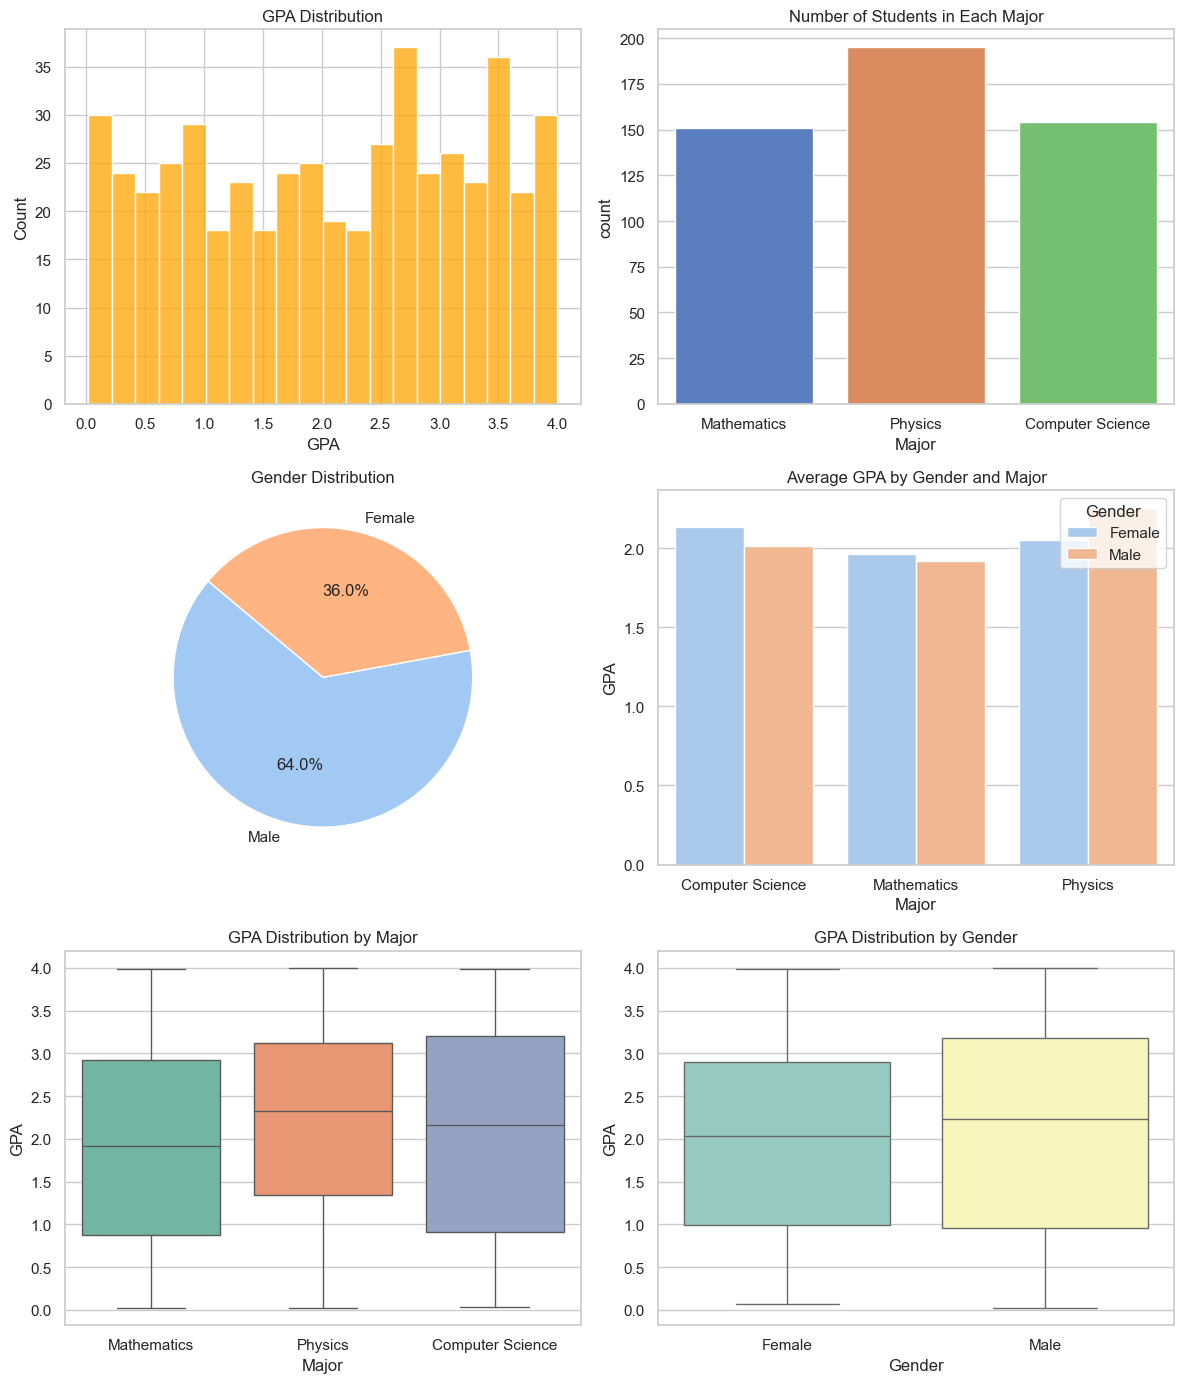

In [150]:
#4.2
# Set style
sns.set(style="whitegrid", palette="pastel")
# Create figure and axis array for 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 14))
axes = axes.ravel()


# 1. Histogram for GPA distribution
sns.histplot(students['GPA'], bins=20, ax=axes[0], color='orange')
axes[0].set_title("GPA Distribution")

# 2. Bar plot for Major counts
sns.countplot(data=students, x='Major', hue='Major', ax=axes[1], palette='muted', legend=False)
axes[1].set_title("Number of Students in Each Major")

# 3. Pie plot for Gender counts
gender_counts = students['Gender'].value_counts()
axes[2].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
axes[2].set_title("Gender Distribution")

# 4. Bar plot show Average GPA by Gender and Major
avg_gpa = students.groupby(['Major', 'Gender'])['GPA'].mean().reset_index()
sns.barplot(data=avg_gpa, x='Major', y='GPA', hue='Gender', palette='pastel', ax=axes[3])
axes[3].set_title("Average GPA by Gender and Major")

# 5. Boxplot of GPA by Major
sns.boxplot(data=students, x='Major', y='GPA', hue='Major', ax=axes[4], palette='Set2', legend=False)
axes[4].set_title("GPA Distribution by Major")

# 6. Boxplot of GPA by Gender
sns.boxplot(data=students, x='Gender', y='GPA', hue='Gender', ax=axes[5], palette='Set3', legend=False)
axes[5].set_title("GPA Distribution by Gender")

plt.tight_layout()
plt.show()

In [ ]:
#4.3
major_counts = students["Major"].value_counts().sort_values(ascending=False)
major_counts

Major
Physics             195
Computer Science    154
Mathematics         151
Name: count, dtype: int64

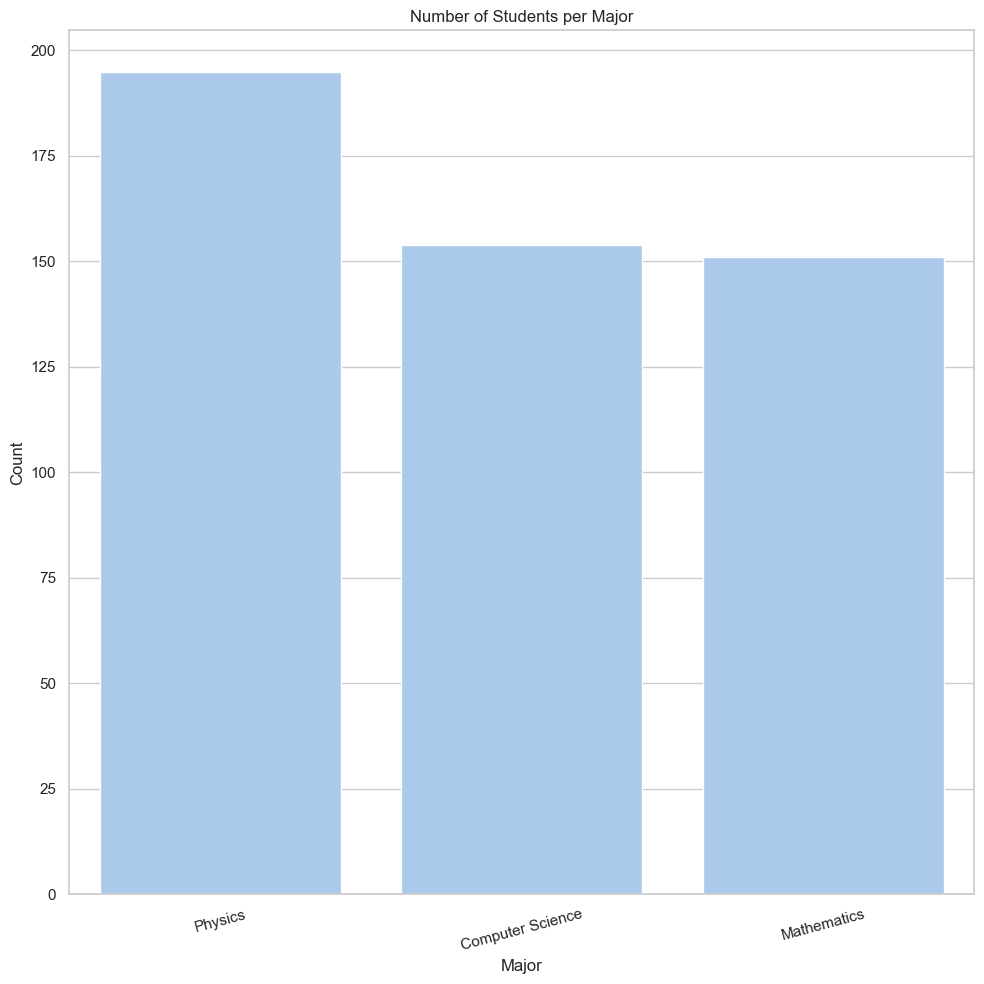

In [140]:
plt.figure(figsize=(10,10))
sns.barplot(x=students["Major"].value_counts().index, y=students["Major"].value_counts().values)
plt.title("Number of Students per Major")
plt.xlabel("Major")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

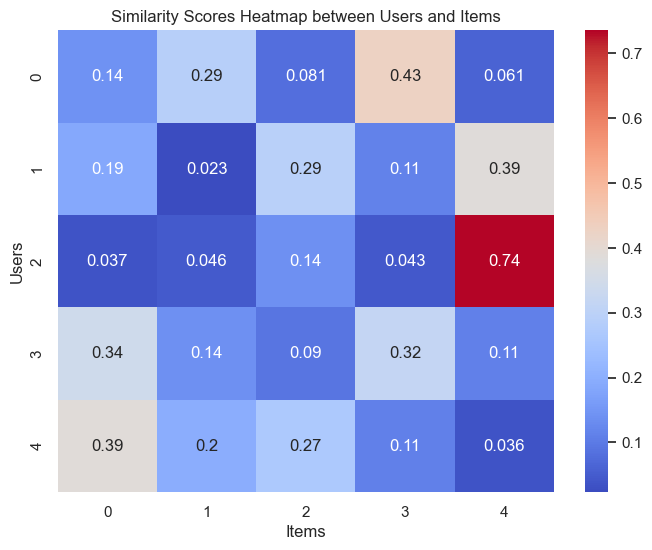

In [146]:
#4.4
# Set random seed for reproducibility
np.random.seed(42)

# Initialize user (U) and item (V) embeddings as 5x8 matrices
d = 8 # embedding dimension
U = np.random.randn(5, d)
V = np.random.randn(5, d)

similarity_raw = np.dot(U, V.T) / np.sqrt(d)

# Apply softmax to each row for similarity scores
exp_scores = np.exp(similarity_raw)
softmax_scores = exp_scores / exp_scores.sum(axis=1, keepdims=True)

# Visualize the similarity scores with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(softmax_scores, annot=True, cmap='coolwarm', cbar=True)
plt.title('Similarity Scores Heatmap between Users and Items')
plt.xlabel('Items')
plt.ylabel('Users')
plt.show()